## Imports

In [1]:
from agentpy import DataDict
import matplotlib.pyplot as plt
import pandas as pd

## Ingest Data

In [ ]:
data = DataDict.load(exp_name='ee_results', exp_id=1, path='results')

fdf = data.variables.Firm.reset_index()

### Standard Deviation of Price Change

In [5]:
print(f"Standard Deviation of Returns: {results['variables']['MarketModel']['Price Change'].std()}")
print(f"Standard Deviation of Signal (D): {0.001}")

Standard Deviation of Returns: 8.798274367969862e-05
Standard Deviation of Signal (D): 0.001


## Plot Behaviors

In [6]:
def plot_sbs(df, params={}):
    """
    Plot two DataFrames side by side with specified titles and axis labels.

    Parameters:
        df (pd.DataFrame): DataFrame containing data for the first plot.
        params (dict): A dictonary of the parameters for the first plot.
    """

    fig, axs = plt.subplots(1, 1, figsize=(12, 6))

    # Plot the left dataframe on the first subplot.
    df.plot(kind='line', x=params['x'], y=params['y'], legend=False, ax=axs)
    axs.set_title(f"{params['title']}")
    axs.set_xlabel(f"{params['x_label']}")
    axs.set_ylabel(f"{params['y_label']}")
    axs.set_xlim(params['xlim'])

    # Show the plot
    plt.tight_layout()
    plt.show()

## Plot Price Behavior

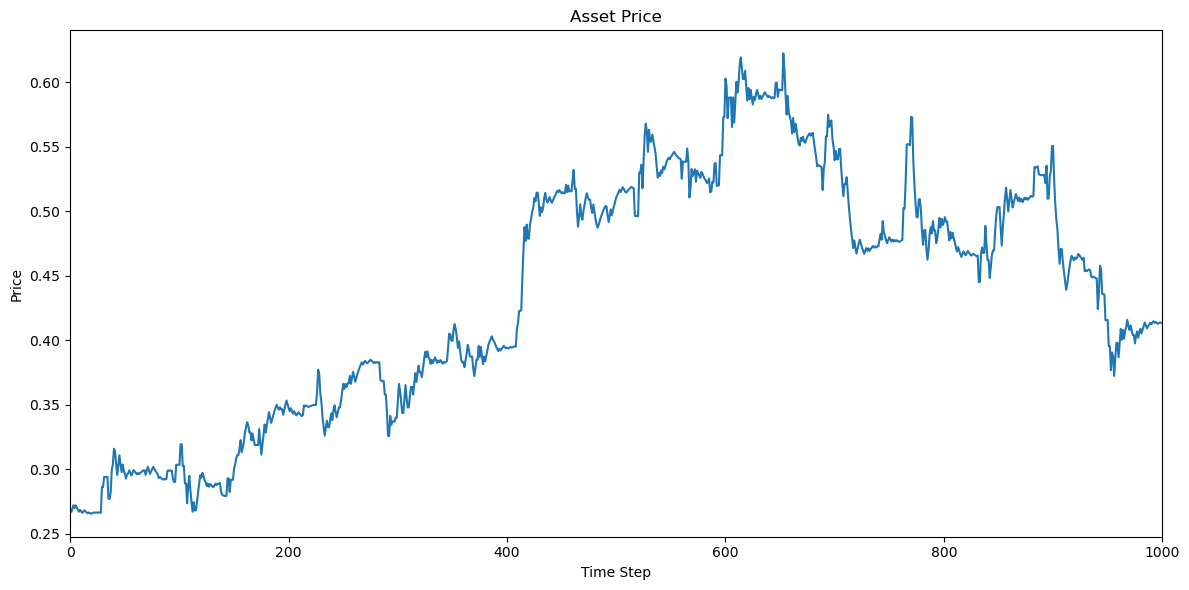

In [133]:
params = {
    'x' : 't',
    'y' : 'Price',
    'title' : 'Asset Price',
    'x_label' : 'Time Step',
    'y_label' : 'Price',
    'xlim' : [0, parameters['steps']]
}

df = results['variables']['MarketModel'].reset_index()
plot_sbs(df=df, params=params)

## Plot Volume Behavior

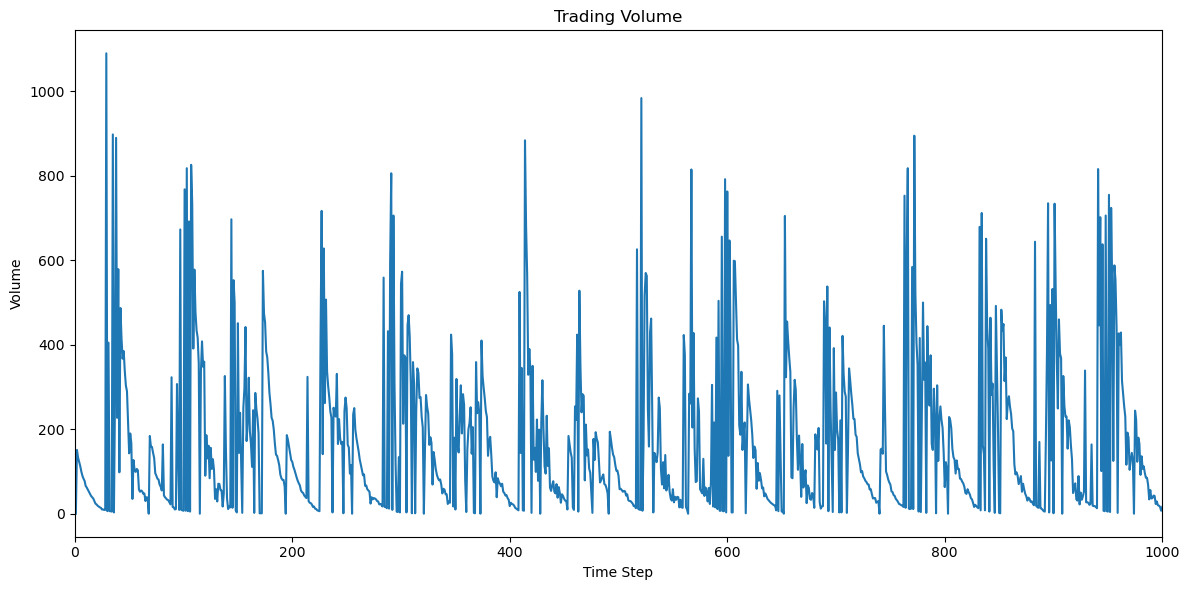

In [134]:
params = {
    'x' : 't',
    'y' : 'Trading Volume',
    'title' : 'Trading Volume',
    'x_label' : 'Time Step',
    'y_label' : 'Volume',
    'xlim' : [0, parameters['steps']]
}

plot_sbs(df=df, params=params)

## Plot Returns

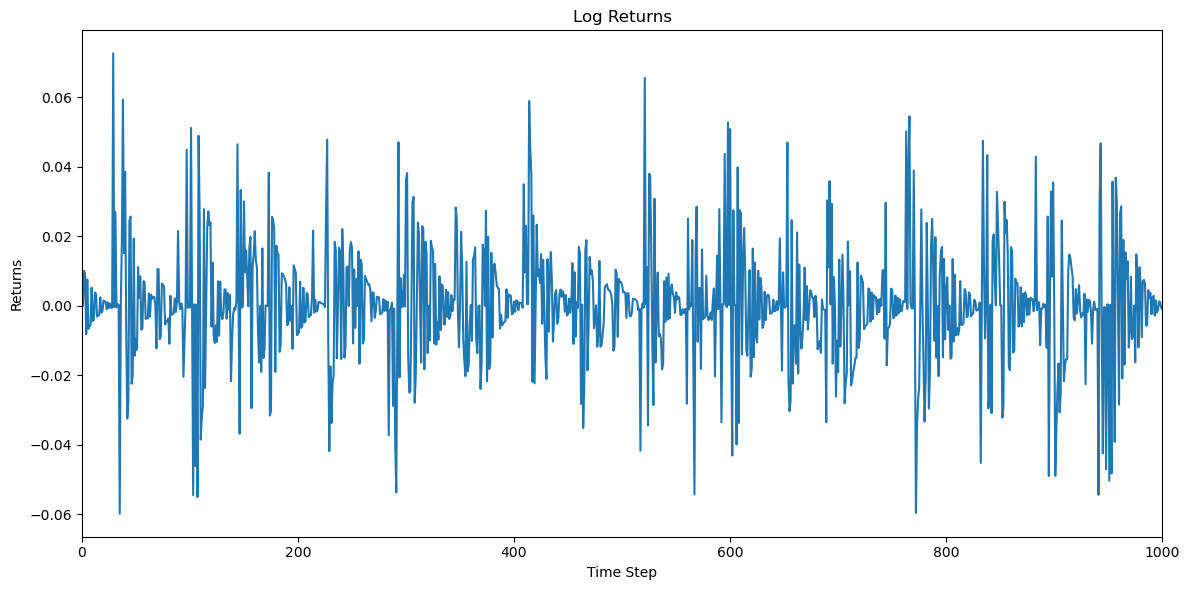

In [136]:
params = {
    'x' : 't',
    'y' : 'Price Change',
    'title' : 'Log Returns',
    'x_label' : 'Time Step',
    'y_label' : 'Returns',
    'xlim' : [0, parameters['steps']]
}

plot_sbs(df=df, params=params)

## Plot Volatility Clustering

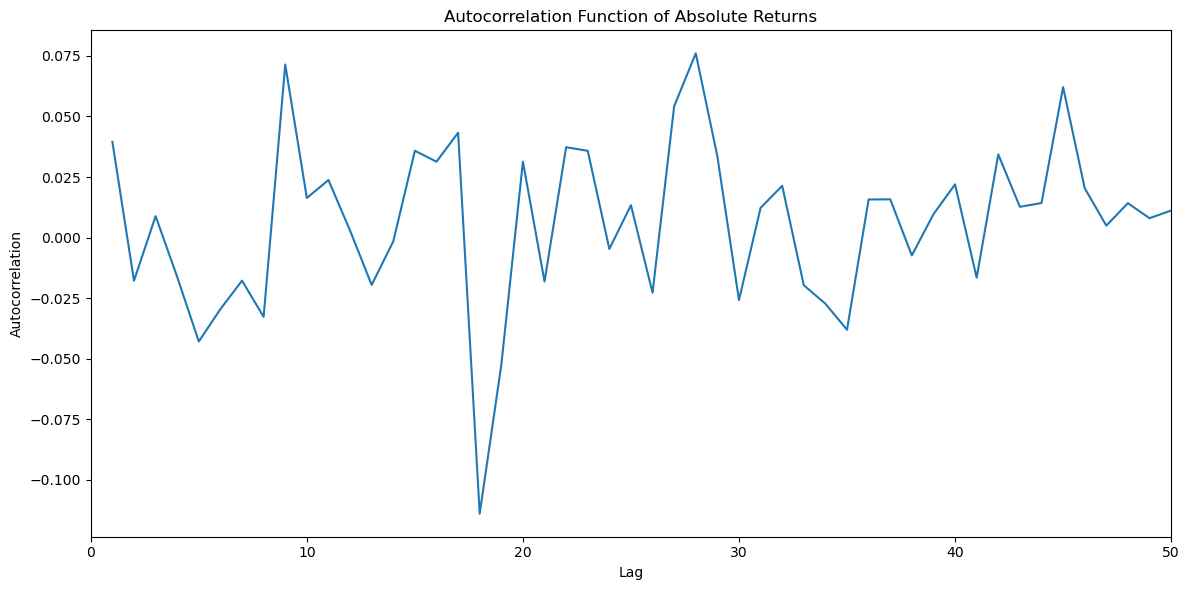

In [7]:
# Assuming 'results' is your DataFrame and 'Price Change' is the column
# with returns.
abs_returns = results['variables']['MarketModel']['Price Change'].abs()

# Calculate autocorrelation for multiple lags, for example, up to 50
# lags.
lags = range(1, 51)
auto_corrs = [abs_returns.autocorr(lag=lag) for lag in lags]

# Create a DataFrame for plotting.
df_auto_corrs = pd.DataFrame({
    'Lag': lags,
    'Autocorrelation': auto_corrs
})

params = {
    'x' : 'Lag',
    'y' : 'Autocorrelation',
    'title' : 'Autocorrelation Function of Absolute Returns',
    'x_label' : 'Lag',
    'y_label' : 'Autocorrelation',
    'xlim' : [0, len(lags)]
}

plot_sbs(df=df_auto_corrs, params=params)

## Plot Agent Asset Holdings

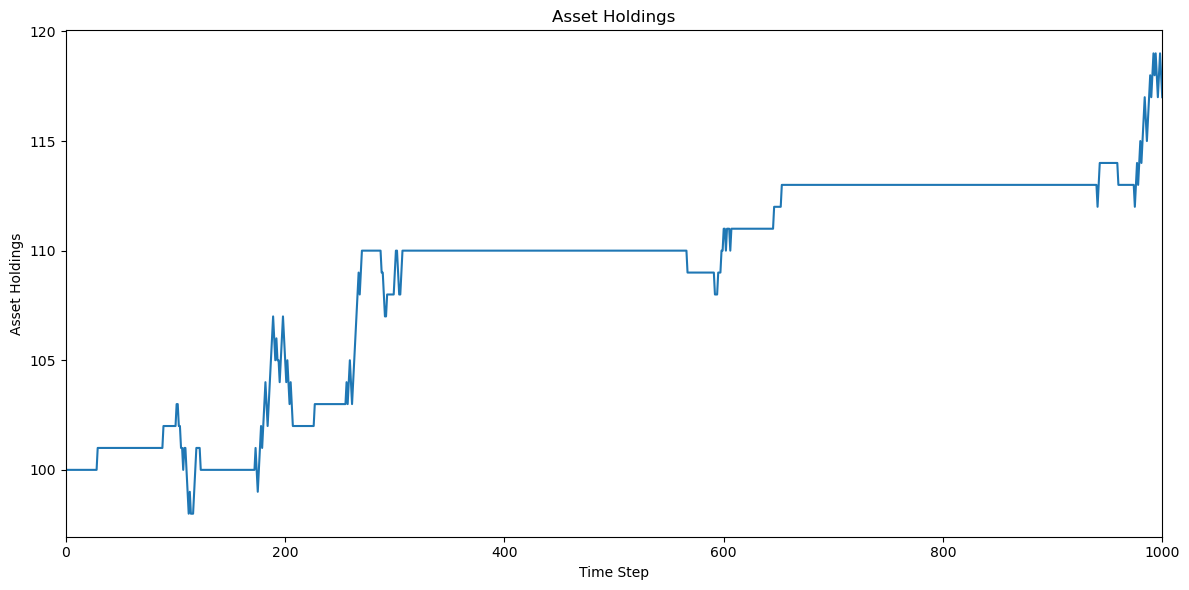

In [139]:
params = {
    'x' : 't',
    'y' : 'Asset Holdings',
    'title' : 'Asset Holdings',
    'x_label' : 'Time Step',
    'y_label' : 'Asset Holdings',
    'xlim' : [0, parameters['steps']]
}

plot_sbs(df=results['variables']['MarketAgent'].reset_index(), params=params)